In [1]:
install.packages("arules")
install.packages("arulesViz")
install.packages("wordcloud")
library(arules)
library(arulesViz)
library(wordcloud)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: grid

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus

Loading required package: RColorBrewer



In [2]:
data <- read.csv("../input/mooc-dataset/big_student_clear_third_version.csv", header=TRUE)

In [3]:
head(data)

,X,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,⋯,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<fct>,⋯,<dbl>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,4,HarvardX,PH207x,2012,Fall,MHxPC130313697,0,0,0,India,⋯,0,2012-07-24,2013-07-27,6,3,197757,0,0,0,23
2,6,HarvardX,PH207x,2012,Fall,MHxPC130237753,1,0,0,United States,⋯,0,2012-07-24,2012-12-24,107,8,7,2,0,0,19
3,7,HarvardX,CS50x,2012,Summer,MHxPC130202970,1,0,0,United States,⋯,0,2012-07-24,2013-03-28,8,1,197757,1,0,0,24
4,20,HarvardX,CS50x,2012,Summer,MHxPC130223941,1,0,0,Other Middle East/Central Asia,⋯,0,2012-07-24,2013-07-15,25,2,197757,4,0,0,20
5,22,HarvardX,PH207x,2012,Fall,MHxPC130317399,0,0,0,Australia,⋯,0,2012-07-24,2012-08-25,3,2,197757,0,0,0,32
6,23,HarvardX,CS50x,2012,Summer,MHxPC130191782,1,0,0,Pakistan,⋯,0,2012-07-24,2013-05-05,2,2,197757,1,0,0,22


# [Q1]

In [4]:
# 1단계
Institute <- data$institute
Course <- data$course_id
Region <- data$final_cc_cname_DI
Degree <- data$LoE_DI

In [5]:
# 2단계
#공백처리
Region <- factor(gsub(' ','',Region)) 
#OtherNorth&CentralAmer.,Caribbean의 ','가 csv변환시 문제가 되어 제거
Region <- factor(gsub(',','',Region)) 
# less than Secondary가 less로 잘리는 문제 해결
Degree <- factor(gsub(' ','',Degree))

In [6]:
# 3단계
RawTransactions <- paste(Institute,Course,Region,Degree,sep="_")

In [7]:
# 4단계
MOOC_transactions <- paste(data$userid_DI,RawTransactions,sep =" ")

In [8]:
# 5단계
write.table(MOOC_transactions,"MOOC_User_Course.csv", sep=",", 
            quote = FALSE, row.names = FALSE, col.names=FALSE)

In [9]:
trans <- read.transactions("MOOC_User_Course.csv", format = "single",
                                cols = c(1,2), rm.duplicates=TRUE)

In [10]:
summary(trans)

transactions as itemMatrix in sparse format with
 335650 rows (elements/itemsets/transactions) and
 1405 columns (items) and a density of 0.000877119 

most frequent items:
    MITx_6.00x_UnitedStates_Bachelor's      MITx_6.00x_UnitedStates_Secondary 
                                 14192                                   8841 
           MITx_6.00x_India_Bachelor's           MITx_6.002x_India_Bachelor's 
                                  7813                                   7633 
HarvardX_CS50x_UnitedStates_Bachelor's                                (Other) 
                                  7410                                 367750 

element (itemset/transaction) length distribution:
sizes
     1      2      3      4      5      6      7      8      9     10     11 
278440  43061   9997   2812    799    293    109     44     37     22     21 
    12     13 
     9      6 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.232   1.000  13.000 

includes 

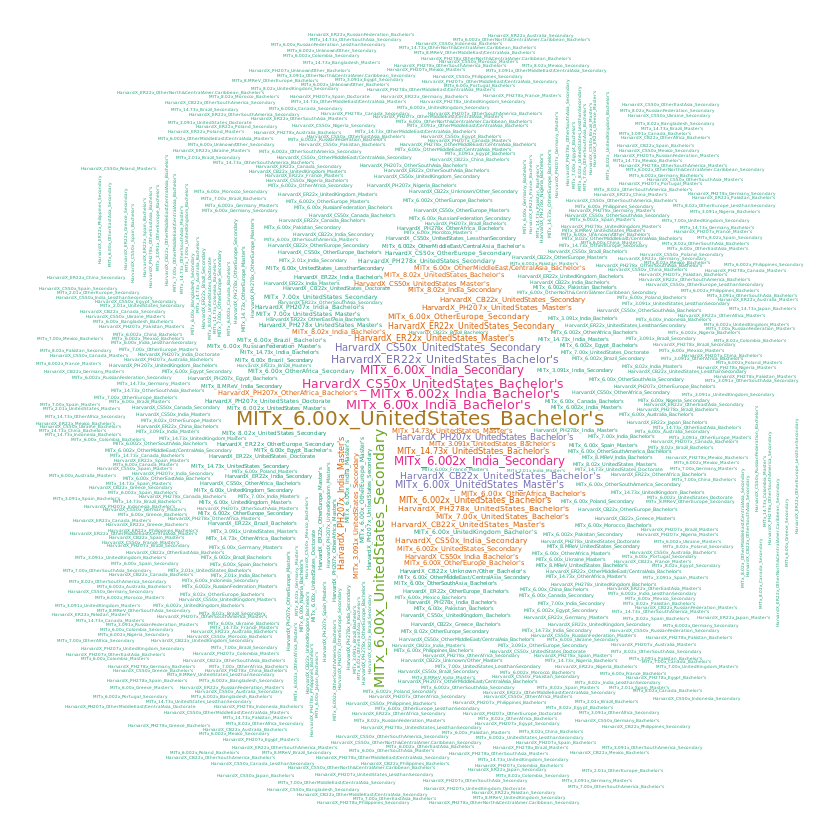

In [11]:
itemName <- itemLabels(trans)
itemCount <- itemFrequency(trans)*nrow(trans)

col <- brewer.pal(7,"Dark2")
wordcloud(words = itemName, freq = itemCount,min.freq = 100, scale = c(1, 0.2), col = col , random.order = FALSE,family = "Rockwell")

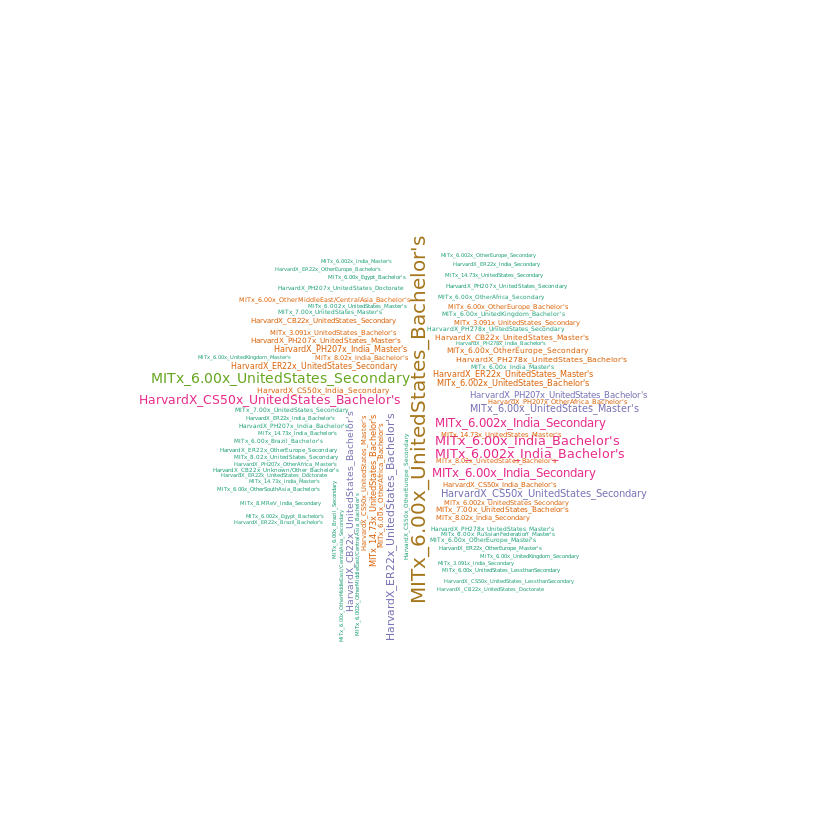

In [12]:
itemName <- itemLabels(trans)
itemCount <- itemFrequency(trans)*nrow(trans)

col <- brewer.pal(7,"Dark2")
wordcloud(words = itemName, freq = itemCount,min.freq = 1000, scale = c(1, 0.2), col = col , random.order = FALSE,family = "Rockwell")

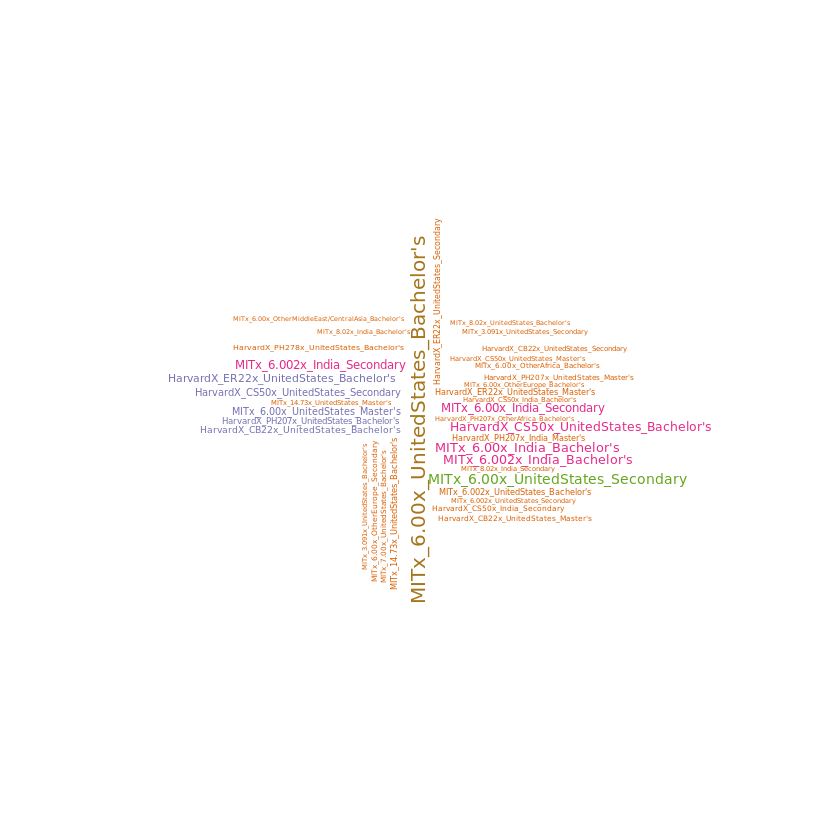

In [13]:
itemName <- itemLabels(trans)
itemCount <- itemFrequency(trans)*nrow(trans)

col <- brewer.pal(7,"Dark2")
wordcloud(words = itemName, freq = itemCount,min.freq = 2000, scale = c(1, 0.2), col = col , random.order = FALSE,family = "Rockwell")

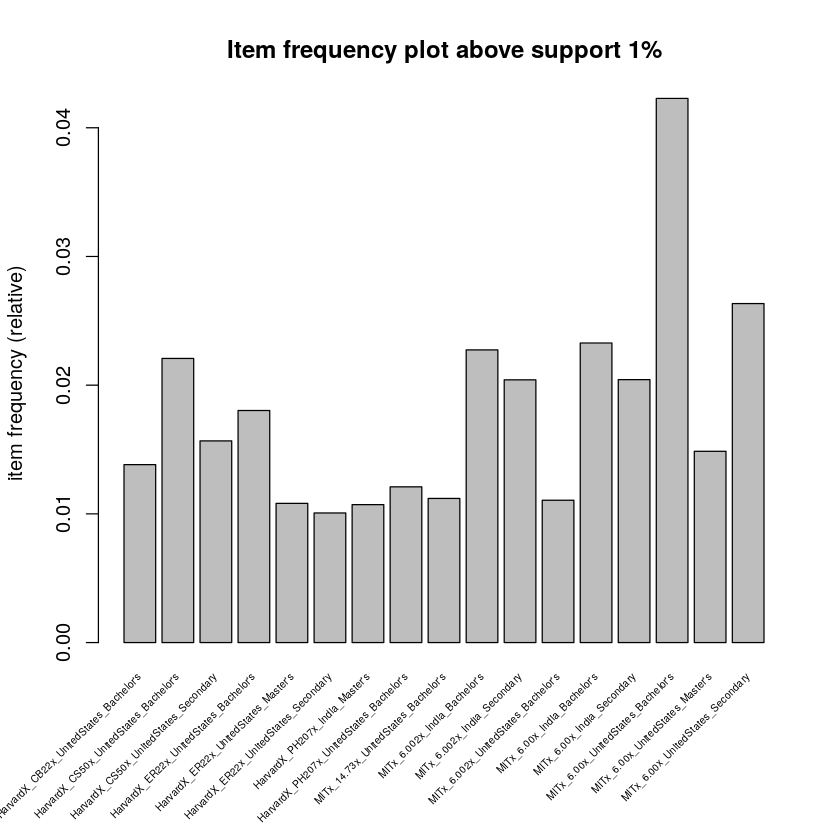

In [14]:
itemFrequencyPlot(trans, support = 0.01, cex.names=0.5, main ="Item frequency plot above support 1%")

In [15]:
rules_num <- matrix(0,nrow=4,ncol=4,dimnames=list(c("support=0.001", "        0.0015","        0.002","        0.0025"),c("confidence=0.05", "0.06", "0.07","0.08")))
for (i in 1:4){
    for(j in 1:4){
        rules_num[i,j]=length(apriori(trans, parameter=list(support=as.double(0.0005*i+0.0005),
                                                       confidence=as.double(0.01*j+0.04))))
    }
}

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.05    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 335 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1405 item(s), 335650 transaction(s)] done [0.13s].
sorting and recoding items ... [251 item(s)] done [0.01s].
creating transaction tree ... done [0.14s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [51 rule(s)] done [0.00s].
creating S4 object  ... done [0.07s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.06    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbo

In [16]:
rules_num

,confidence=0.05,0.06,0.07,0.08
support=0.001,51,49,45,40
0.0015,29,28,27,25
0.002,20,20,19,18
0.0025,14,14,13,13


In [17]:
rules <- apriori(trans, parameter=list(support=0.001, confidence=0.05))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.05    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 335 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1405 item(s), 335650 transaction(s)] done [0.12s].
sorting and recoding items ... [251 item(s)] done [0.01s].
creating transaction tree ... done [0.14s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [51 rule(s)] done [0.00s].
creating S4 object  ... done [0.06s].


In [18]:
inspect(sort(rules, by="support")[1])

    lhs                                         rhs                                      support confidence   coverage     lift count
[1] {HarvardX_CS50x_UnitedStates_Bachelor's} => {MITx_6.00x_UnitedStates_Bachelor's} 0.003643676  0.1650472 0.02207657 3.903474  1223


In [19]:
inspect(sort(rules, by="confidence")[1])

    lhs                             rhs                               support confidence   coverage     lift count
[1] {MITx_8.02x_India_Secondary} => {MITx_6.002x_India_Secondary} 0.002800536   0.388109 0.00721585 19.01179   940


In [20]:
inspect(sort(rules, by="lift")[1])

    lhs                                     rhs                                      support confidence    coverage     lift count
[1] {MITx_8.02x_UnitedStates_Bachelor's} => {MITx_6.002x_UnitedStates_Bachelor's} 0.00139133  0.2162037 0.006435275 19.54978   467


In [21]:
df <- as(rules,"data.frame")
df[,7]<-df[,2]*df[,3]*df[,5] #support*confidence*lift
df[order(-df[,7])[1:3],]

,rules,support,confidence,coverage,lift,count,V7
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
23,{MITx_8.02x_India_Secondary} => {MITx_6.002x_India_Secondary},0.002800536,0.3881090,0.007215850,19.01179,940,0.02066417
5,{MITx_8.02x_India_Bachelor's} => {MITx_6.002x_India_Bachelor's},0.002496648,0.3856420,0.006474006,16.95804,838,0.01632741
25,{HarvardX_CS50x_India_Secondary} => {MITx_6.00x_India_Secondary},0.002681365,0.2939255,0.009122598,14.38555,900,0.01133756


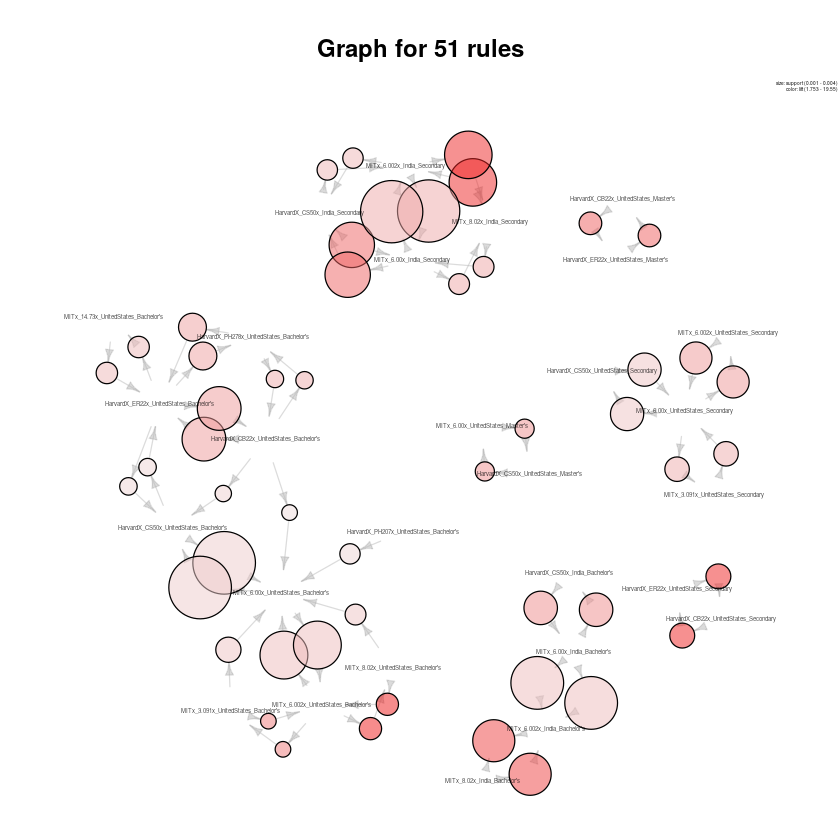

In [22]:
plot(rules, method="graph",cex=0.3)

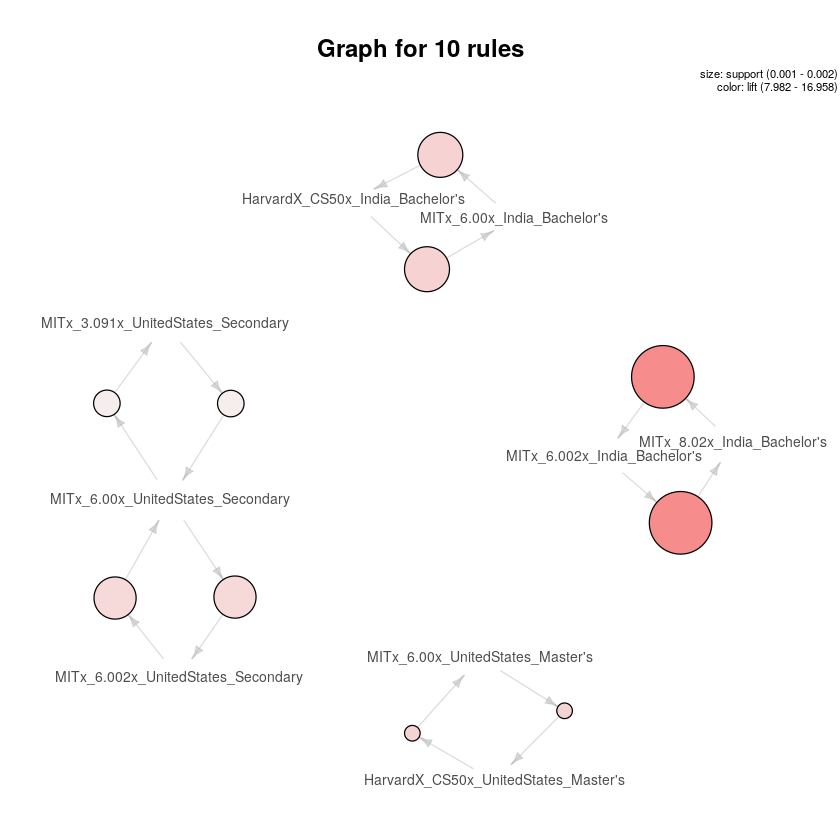

In [23]:
plot(rules[1:10], method="graph",cex=0.7)

In [24]:
inspect(rules[1:10])

     lhs                                       rhs                                        support confidence    coverage      lift count
[1]  {HarvardX_CS50x_UnitedStates_Master's} => {MITx_6.00x_UnitedStates_Master's}     0.001218531 0.16985050 0.007174140 11.429495   409
[2]  {MITx_6.00x_UnitedStates_Master's}     => {HarvardX_CS50x_UnitedStates_Master's} 0.001218531 0.08199679 0.014860718 11.429495   409
[3]  {HarvardX_CS50x_India_Bachelor's}      => {MITx_6.00x_India_Bachelor's}          0.002016982 0.26918489 0.007492924 11.564304   677
[4]  {MITx_6.00x_India_Bachelor's}          => {HarvardX_CS50x_India_Bachelor's}      0.002016982 0.08665045 0.023277223 11.564304   677
[5]  {MITx_8.02x_India_Bachelor's}          => {MITx_6.002x_India_Bachelor's}         0.002496648 0.38564197 0.006474006 16.958041   838
[6]  {MITx_6.002x_India_Bachelor's}         => {MITx_8.02x_India_Bachelor's}          0.002496648 0.10978645 0.022740950 16.958041   838
[7]  {MITx_3.091x_UnitedStates_Secondary}